In [47]:
import os
import numpy as np
import rasterio
from rasterio.warp import reproject, Resampling
from tqdm import tqdm
import pandas as pd
from importlib import reload
import func_collection
reload(func_collection)

from func_collection import download_zip, main_zip_extract,data_extract, data_sanity_check,\
prepare_esrgan_dataset,process_and_stack_images,build_esrgan_pair,visualize_split_pairs,plot_8_channel



#### Download

In [16]:
urls= ["https://zenodo.org/records/14603764/files/ALSACE.zip?download=1","https://zenodo.org/records/14603764/files/ANJI.zip?download=1",
       "https://zenodo.org/records/14603764/files/LERIDA-1.zip?download=1","https://zenodo.org/records/14603764/files/NARYN.zip?download=1",
       "https://zenodo.org/records/14603764/files/BENGA.zip?download=1",
       ]

In [17]:
# ONLY FOR FIRST TIME RUNNING
# output_paths = ["zips/ALSACE.zip", "zips/ANJI.zip", "zips/LERIDA-1.zip", "zips/NARYN.zip", "zips/BENGA.zip"]
# for i, url in enumerate(urls):
#     try:
#         output_path = output_paths[i]
#         download_zip(url, output_path)
#     except Exception as e:
#         print(f"Error downloading {url}: {e}")
#         traceback.print_exc()

#### Extract

In [18]:
## ONLY FOR FIRST TIME RUNNING
# extracted_dirs= [
#     'extracted/ALSACE',
#     'extracted/ANJI',
#     'extracted/LERIDA-1',
#     'extracted/NARYN',
#     'extracted/BENGA'
# ]
# for i, zip_str in enumerate(output_paths):
#     try:
#         main_zip_extract(
#             zip_file_path=zip_str,
#             output_dir='extracted'
#         )
#     except Exception as e:
#         print(f"Error extracting {zip_str}: {e}")
#         traceback.print_exc()

#### Rename

In [19]:
# ## ONLY FOR FIRST TIME RUNNING
# site_names= [
#     "ALSACE",
#     "ANJI",
#     "LERIDA-1",
#     "NARYN",
#     "BENGA",
#     "SO2"
# ]
# # Extract data from the CSV file and zip files
# for site_name in site_names:
#     try:
#         data_extract(
#             input_dir=f"extracted/{site_name}/",
#             input_csv_path=f"extracted/{site_name}/index.csv",
#             output_dir_name=f"data/{site_name}",
#             output_csv_path=f"data/{site_name}/index.csv",
#             input_index_col=False,
#             input_dataframe_sep="\t",
#             output_dataframe_sep=",",
#             output_index=False
#         )
#     except Exception as e:
#         print(f"Error processing {site_name}: {e}")
#         traceback.print_exc()


#### Build Pairs

In [20]:
sites = ["ALSACE", "ANJI", "BENGA", "LERIDA-1", "NARYN", "SO2"]

for site in sites:
    build_esrgan_pair(
        site=site,
        csv_path=f"data/{site}/index.csv",
        data_root=f"data/{site}",   # this is where b2b3b4b8_10m/, b2b3b4b8_05m/ etc. live
        output_root="esrgan_dataset_rgbi_channel",
        base_path="2x",
        lr_col="b2b3b4b8_10m",
        hr_col="b2b3b4b8_05m",
    )

[ALSACE]: 100%|██████████| 2653/2653 [00:01<00:00, 1851.60it/s]


[ALSACE] Done. Paired: 2653 | Skipped: 0


[ANJI]: 100%|██████████| 2312/2312 [00:01<00:00, 1864.32it/s]


[ANJI] Done. Paired: 2312 | Skipped: 0


[BENGA]: 100%|██████████| 5857/5857 [00:02<00:00, 2861.77it/s]


[BENGA] Done. Paired: 5857 | Skipped: 0


[LERIDA-1]: 100%|██████████| 2281/2281 [00:01<00:00, 1675.02it/s]


[LERIDA-1] Done. Paired: 2281 | Skipped: 0


[NARYN]: 100%|██████████| 3813/3813 [00:02<00:00, 1650.08it/s]


[NARYN] Done. Paired: 3813 | Skipped: 0


[SO2]: 100%|██████████| 738/738 [00:00<00:00, 4156.97it/s]

[SO2] Done. Paired: 738 | Skipped: 0


In [ ]:
for site in sites:
    build_esrgan_pair(
        site=site,
        csv_path=f"data/{site}/index.csv",
        data_root=f"data/{site}",   # this is where b2b3b4b8_10m/, b2b3b4b8_05m/ etc. live
        output_root="esrgan_dataset_5678_channel",
        base_path="4x",
        lr_col="b5b6b7b8a_20m",
        hr_col="b5b6b7b8a_05m",
    )


[ALSACE]: 100%|██████████| 2653/2653 [00:01<00:00, 1844.86it/s]


[ALSACE] Done. Paired: 2653 | Skipped: 0


[ANJI]: 100%|██████████| 2312/2312 [00:01<00:00, 1663.71it/s]


[ANJI] Done. Paired: 2312 | Skipped: 0


[BENGA]: 100%|██████████| 5857/5857 [00:03<00:00, 1628.13it/s]


[BENGA] Done. Paired: 5857 | Skipped: 0


[LERIDA-1]: 100%|██████████| 2281/2281 [00:01<00:00, 1660.53it/s]


[LERIDA-1] Done. Paired: 2281 | Skipped: 0


[NARYN]: 100%|██████████| 3813/3813 [00:02<00:00, 1641.64it/s]


[NARYN] Done. Paired: 3813 | Skipped: 0


[SO2]: 100%|██████████| 738/738 [00:00<00:00, 1614.44it/s]

[SO2] Done. Paired: 738 | Skipped: 0


#### Downsample and 8 Channel stacking

In [22]:
# Process all sites
sites = ["ALSACE", "ANJI", "BENGA", "LERIDA-1", "NARYN", "SO2"]
for site in sites:
    process_and_stack_images(
        csv_path=f"data/{site}/index.csv",
        data_root=f"data/{site}/",
        output_root="stacked_images",
        site_name=site
    )

Processing ALSACE: 100%|██████████| 2653/2653 [00:34<00:00, 77.03it/s]


Processing complete for ALSACE. Stacks saved to stacked_images/8_channel/ALSACE


Processing ANJI: 100%|██████████| 2312/2312 [00:29<00:00, 78.07it/s]


Processing complete for ANJI. Stacks saved to stacked_images/8_channel/ANJI


Processing BENGA: 100%|██████████| 5857/5857 [01:14<00:00, 78.49it/s]


Processing complete for BENGA. Stacks saved to stacked_images/8_channel/BENGA


Processing LERIDA-1: 100%|██████████| 2281/2281 [00:29<00:00, 77.68it/s]


Processing complete for LERIDA-1. Stacks saved to stacked_images/8_channel/LERIDA-1


Processing NARYN: 100%|██████████| 3813/3813 [00:48<00:00, 78.82it/s]


Processing complete for NARYN. Stacks saved to stacked_images/8_channel/NARYN


Processing SO2: 100%|██████████| 738/738 [00:09<00:00, 78.88it/s]

Processing complete for SO2. Stacks saved to stacked_images/8_channel/SO2


#### Train-Validation-Test Splitting

In [26]:
path = "stacked_images/8_channel"
sites = ["ALSACE", "ANJI", "BENGA", "LERIDA-1", "NARYN", "SO2"]

In [27]:
prepare_esrgan_dataset(
    base_path=path,
    sites=sites,
    output_root="Dataset_8_channel"  
)

ESRGAN dataset prepared at Dataset_8_channel
Split counts:
train: 12355 HR images, 12355 LR images
val: 2649 HR images, 2649 LR images
test: 2650 HR images, 2650 LR images


In [ ]:
path = "esrgan_dataset_5678_channel/4x"

In [39]:
prepare_esrgan_dataset(
    base_path=path,
    sites=sites,
    output_root="Dataset_5678",
    lr_dirname="LR",
    hr_dirname="HR"  
)

ESRGAN dataset prepared at Dataset_5678
Split counts:
train: 12355 HR images, 12355 LR images
val: 2649 HR images, 2649 LR images
test: 2650 HR images, 2650 LR images


In [40]:
path = "esrgan_dataset_rgbi_channel/2x"

In [41]:
prepare_esrgan_dataset(
    base_path=path,
    sites=sites,
    output_root="Dataset_rgbi",
    lr_dirname="LR",
    hr_dirname="HR"  
)

ESRGAN dataset prepared at Dataset_rgbi
Split counts:
train: 12355 HR images, 12355 LR images
val: 2649 HR images, 2649 LR images
test: 2650 HR images, 2650 LR images


#### Visualization

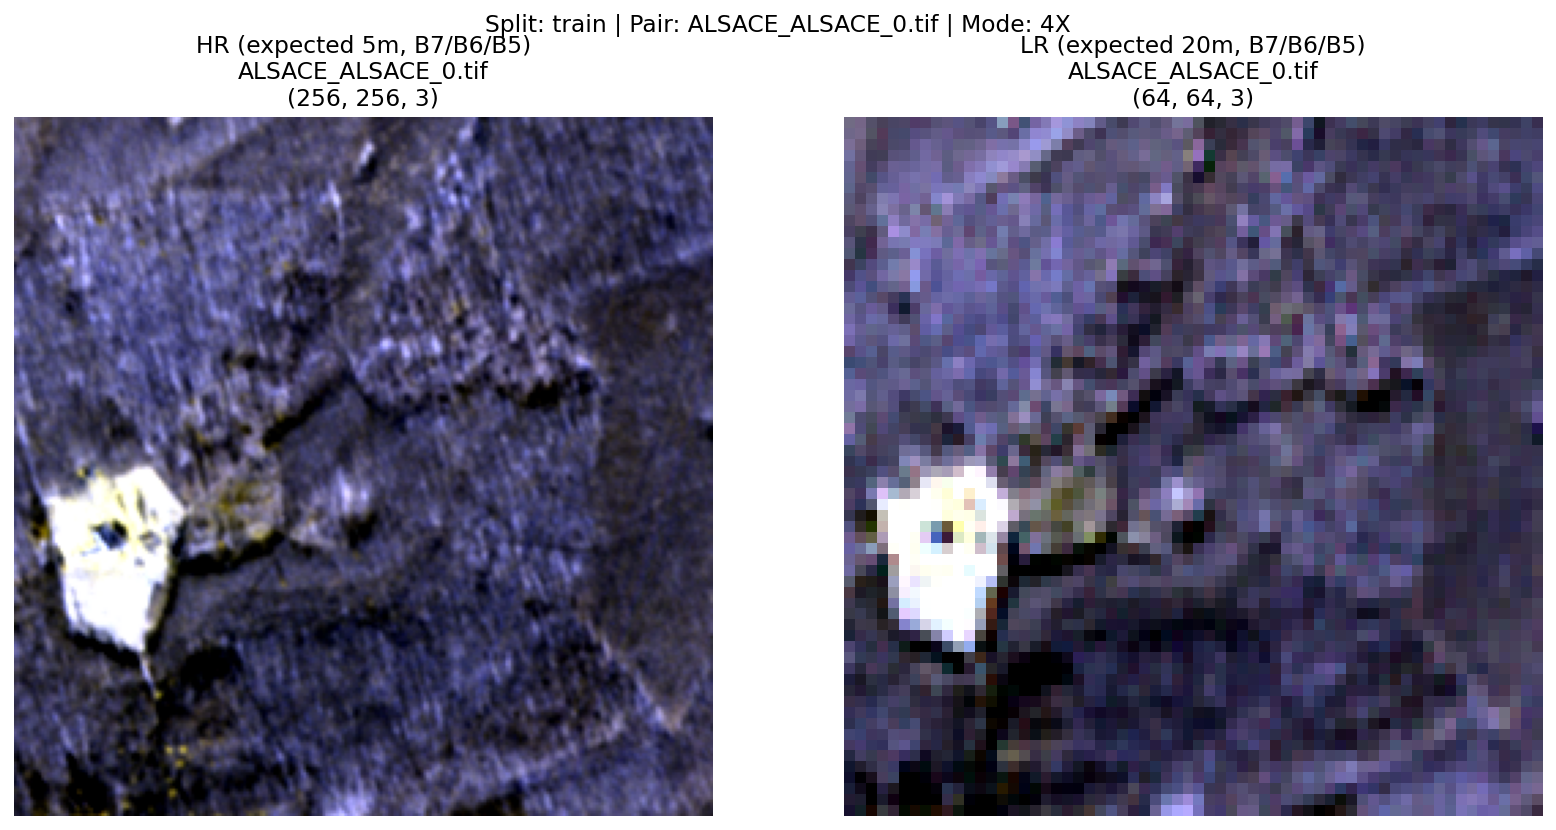

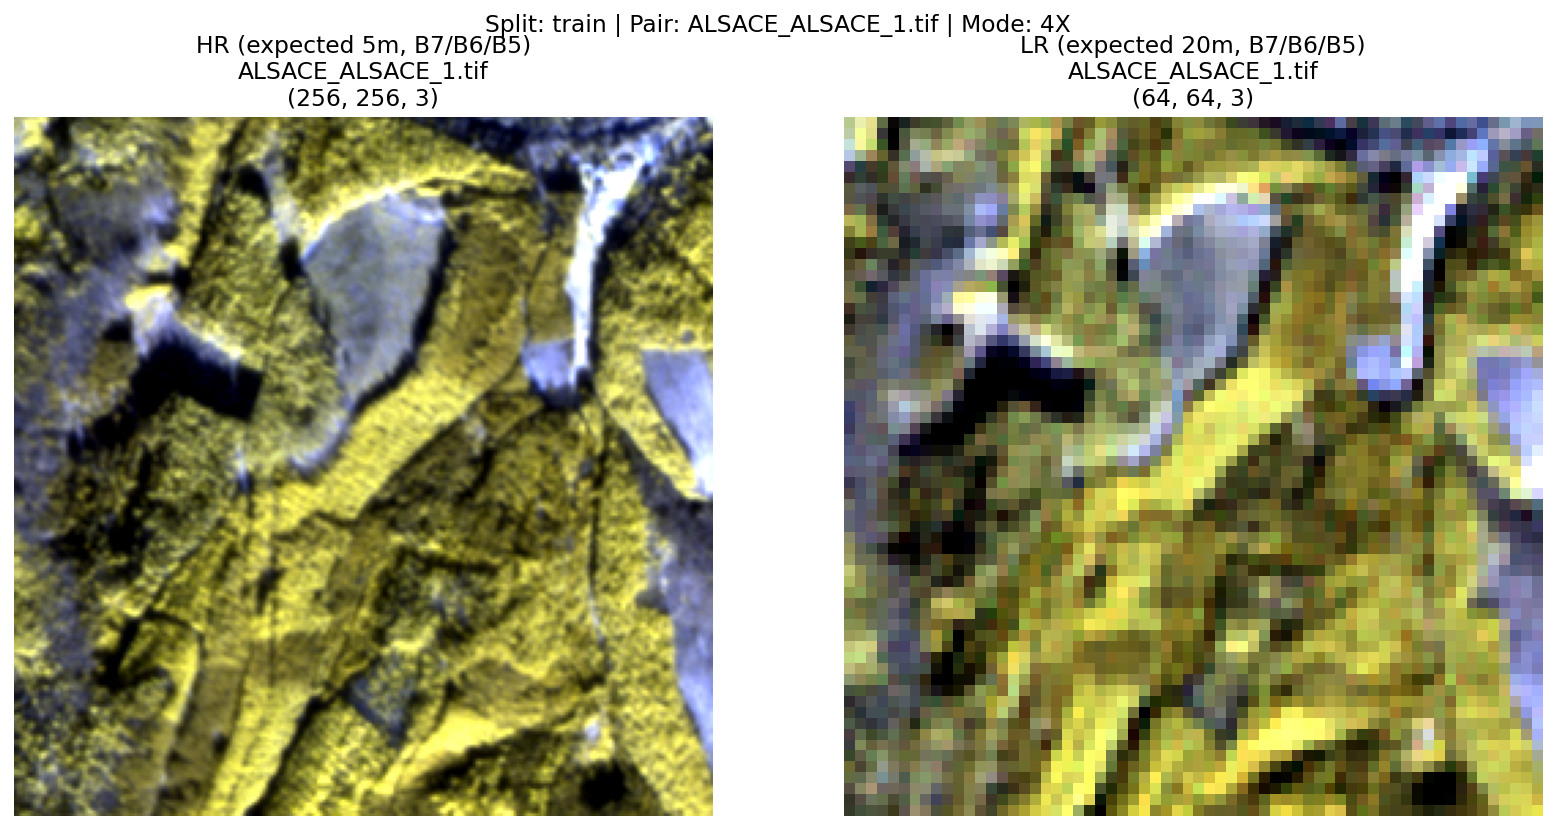

In [45]:
visualize_split_pairs(
    split_dir="Dataset_5678/train",
    band_combination="4x",
    rows_to_plot=2,
)


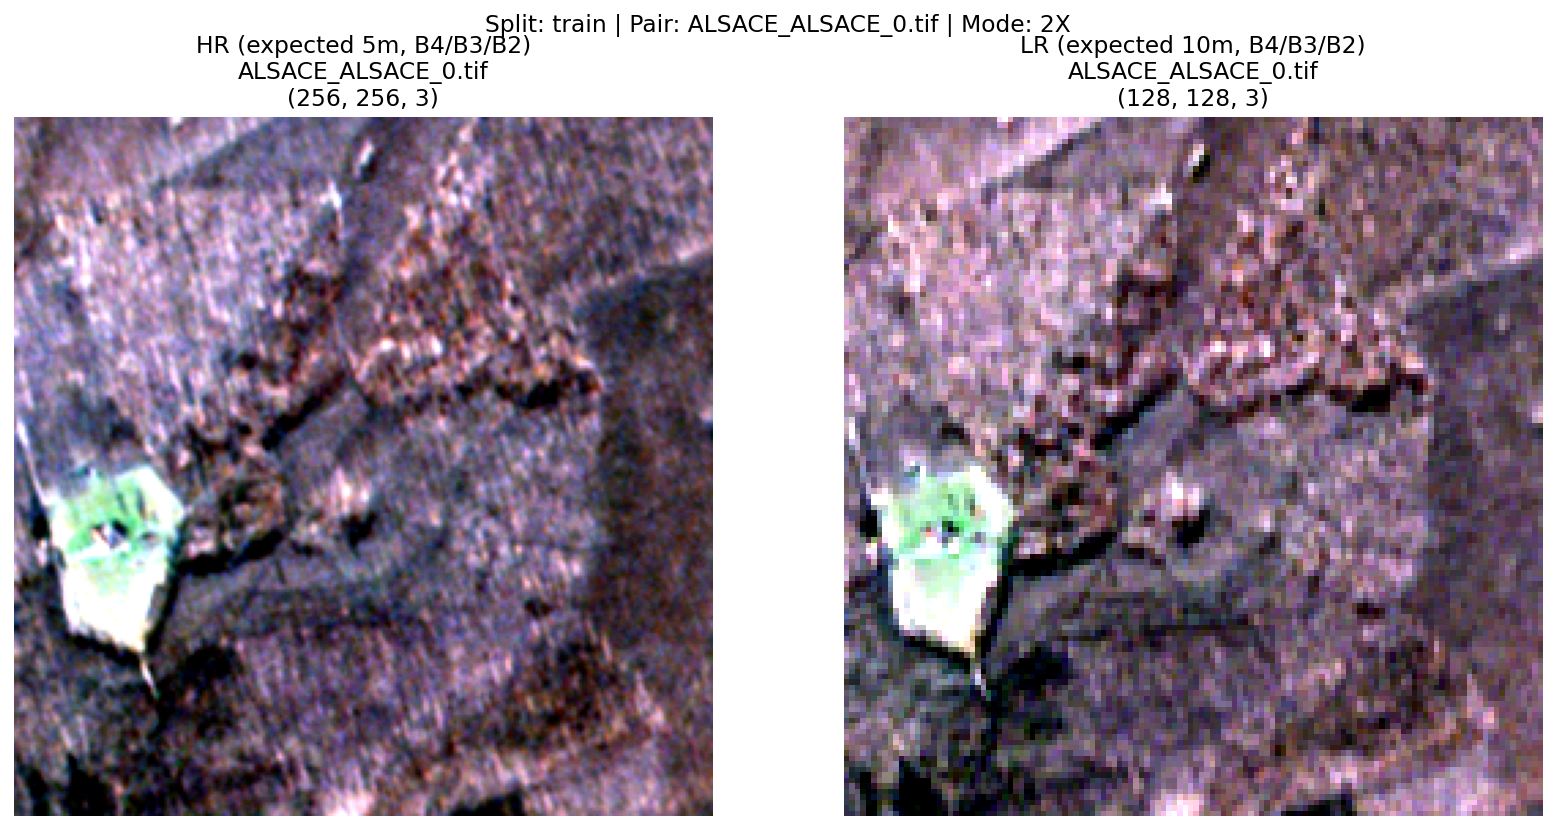

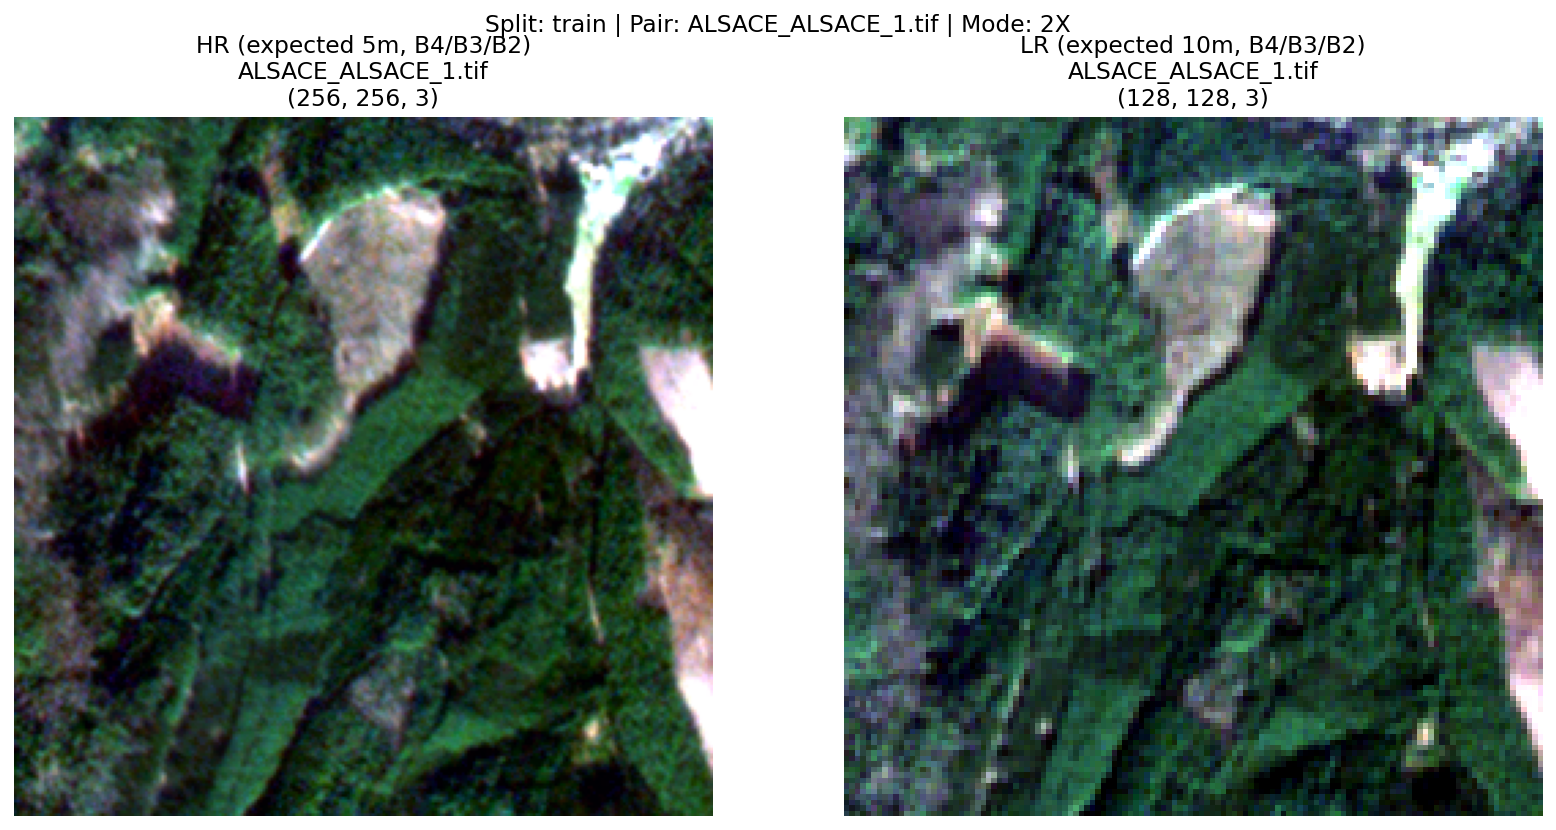

In [46]:
visualize_split_pairs(
    split_dir="Dataset_rgbi/train",
    band_combination="2x",
    rows_to_plot=2,
)


20m Stacked Images:


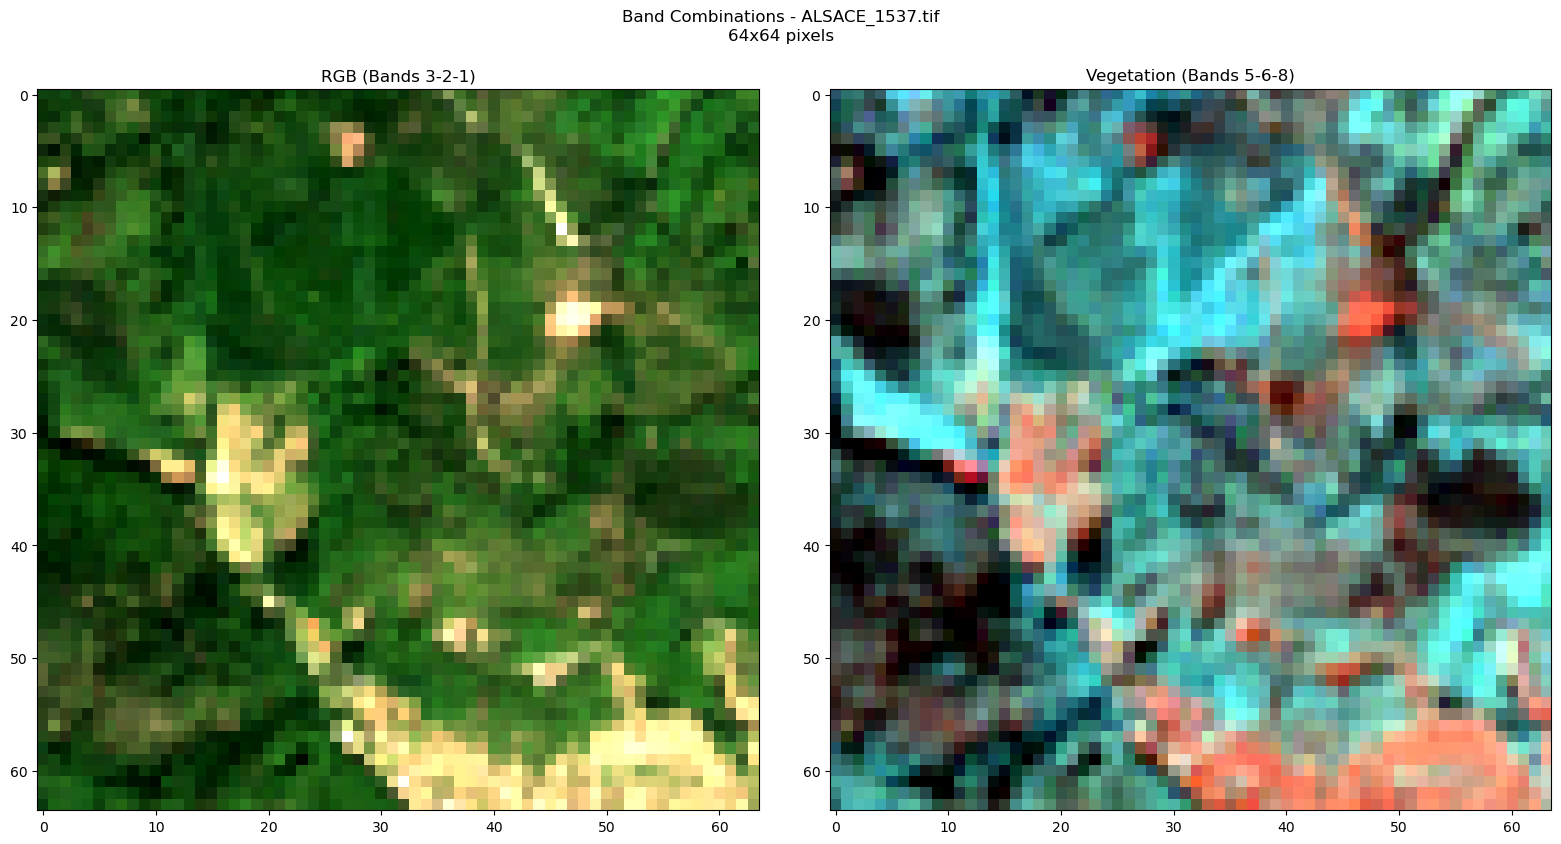

In [50]:
print("20m Stacked Images:")
plot_8_channel(
    stacked_dir="stacked_images/8_channel/ALSACE/20m",
    output_dir="band_visualizations/20m",
    rows_to_plot=1
)


5m Stacked Images:


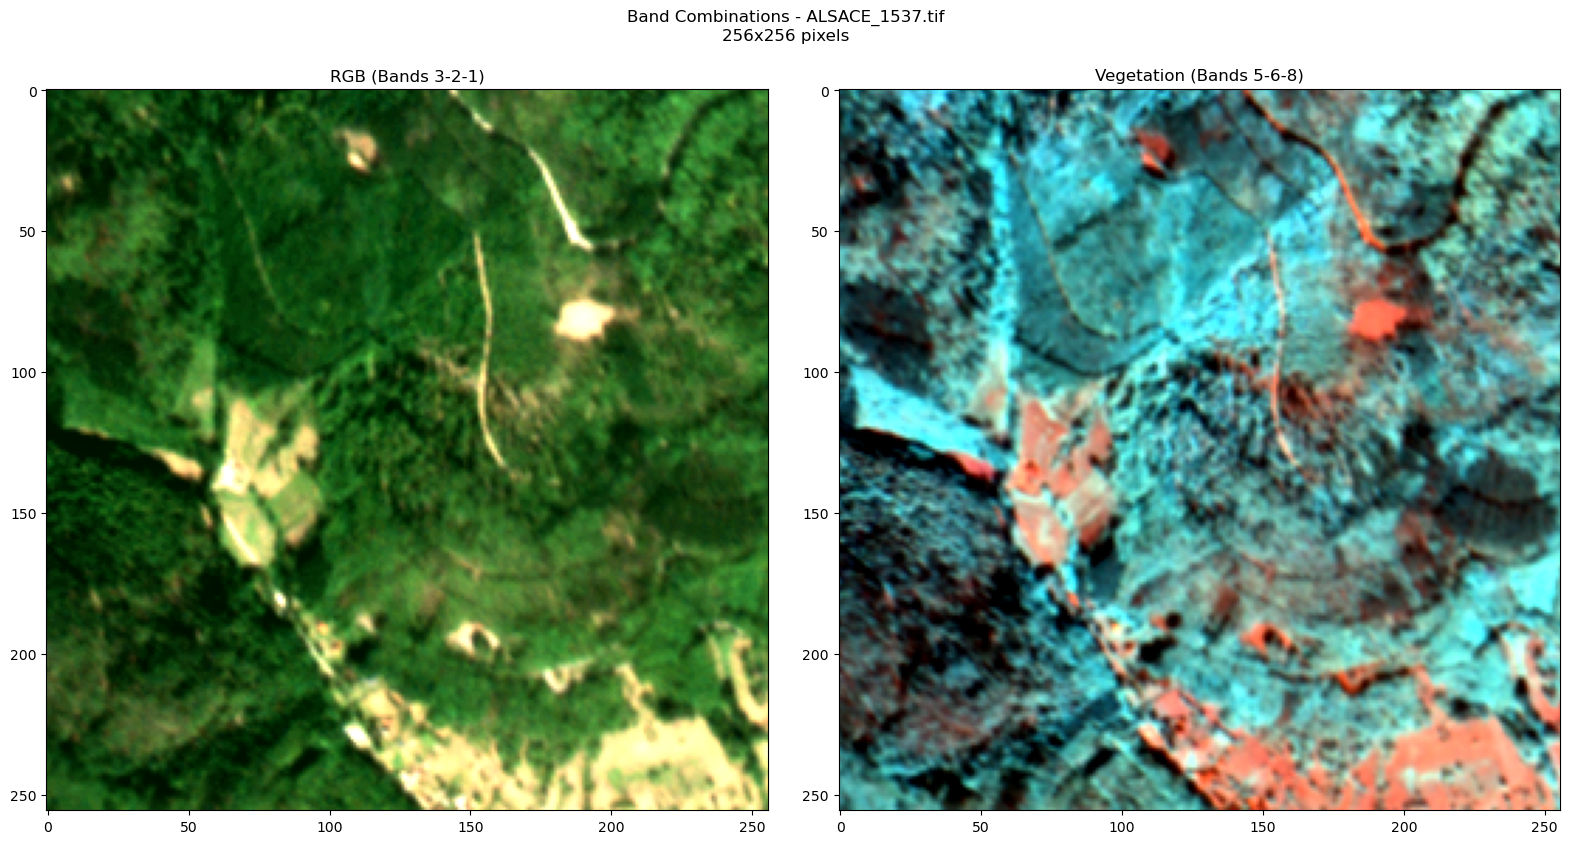

In [51]:
print("\n5m Stacked Images:")
plot_8_channel(
    stacked_dir="stacked_images/8_channel/ALSACE/5m",
    output_dir="band_visualizations/5m",
    rows_to_plot=1
)